## GettingStarted.ipynb

In this code, we will run basic Python code to make sure Python is properly installed at your device.

Code for the Chicago Booth course on Quantitative Portfolio Management by Ralph S.J. Koijen and (current and former) teaching assistants Sangmin Oh, Federico Mainardi, and Laurenz de Rosa.

### 1. Importing Packages

This notebook tests that your Python installation works. 

- You can download the data from: https://www.dropbox.com/scl/fo/ze2tut4prlptuyhuyofx4/AI7wV4q-6e-KDBSnRhyJptI?rlkey=93yaxhwrk0w8drx5d7o71cvow&dl=0. 
- Please copy the file `GettingStartedSample.parquet` to a local folder. 

Now we're ready to start! The goal is not to understand the code yet (we will by the end of the course); just to see that you Python installation works.

Every box that has "[]:" in front of it needs to be run. To run it, put your cursor in the box and then push the "play button" on top. Alternatively, you can press "shift+enter."

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
print('Packages successfully imported..!')

Packages successfully imported..!


Before we get started, make sure to enter the path to your directory that contains the data.

In [2]:
_DATA_DIR = 'Data'      # <-- Edit this line

## GettingStarted.ipynb

This script is intended to make sure that Python 3 is installed properly.

### 2. Loading Data

We will use datasets with `.parquet` format.

For importing `.parquet` files, we will use the `read_parquet` function available in the `pandas` package:

In [3]:
df = pd.read_parquet('%s/GettingStartedSample.parquet' %(_DATA_DIR)).set_index('date')
print(df.head(5))
print('\n.dta file successfully loaded!')

            permno       prc          comnam
date                                        
2001-01-01   84788  0.865625  AMAZON COM INC
2001-02-01   84788  0.509375  AMAZON COM INC
2001-03-01   84788  0.511500  AMAZON COM INC
2001-04-01   84788  0.789000  AMAZON COM INC
2001-05-01   84788  0.834500  AMAZON COM INC

.dta file successfully loaded!


Throughout the course, you will be able use data already prepared for you. Alternatively, you may also decide to download and construct datasets directly from WRDS. This choice is advisable for those of you that would like to keep using these scripts in the future. In order to download and construct data directly from WRDS, we proceed in three steps:
1. Make sure to have a WRDS account with associated username and password.
3. Once you complete step 1., you can run the cell below.
4. A message will appear in the cell output. This is Python asking to confirm your username and password.
5. Type your username and press Enter. Type your password and press Enter one more time.
5. As a last step, Python will ask you to confirm the creation of a web connection. You can confirm by typing the word y.

Congratulations! You are now ready to download data directly from the web.

In [4]:
import_data = False         # <-- Edit this line

if import_data == True:
    
    # Choose start and end dates
    start_date = '2001-01-01'
    end_date = '2024-09-30'

    # Establish connection with wrds
    db = wrds.Connection()

    # Define your SQL statement
    sql_statement = """
    SELECT a.permno, b.ticker, a.date, a.prc, a.cfacshr, b.comnam
    FROM crsp_m_stock.msf as a
    LEFT JOIN crsp_m_stock.msenames as b
    ON a.permno=b.permno AND b.namedt<=a.date AND a.date<=b.nameendt
    WHERE a.date >= '{}' AND a.date <= '{}' AND b.ticker = 'AMZN'
    """

    # Perform the query
    df = db.raw_sql(sql_statement.format(start_date, end_date))
    
    # Reformat date
    df['date'] = pd.to_datetime(df['date'])
    
    # Restrict to one specific stock: AMAZON
    #df = df[df['permno'] == 84788]
    
    # Adjust prices for stock splits, issuance etc.
    df['prc'] = df['prc']/df['cfacshr']
    
    # Minor adjustments
    df = df[['permno','date','comnam','prc']].set_index('date') # Restrict attention to variables of interest: PERMNO, Date, Company Name and Price

    # Close the connection
    db.close()
    
    print(df.head(5))
    print('\n.dta file successfully loaded!')

### 3. Plotting Data

We will create a basic plot to test the functionality:

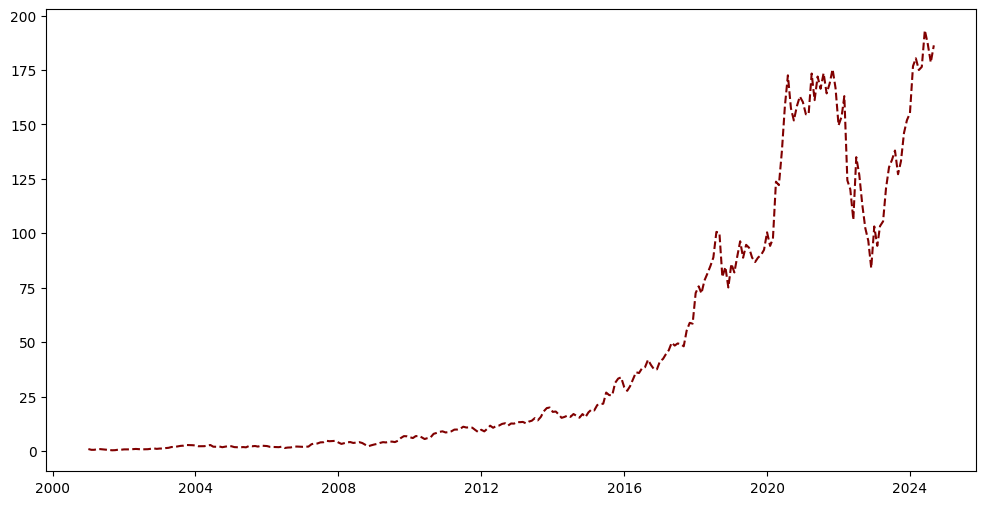


Plot successfully plotted!


In [5]:
fig = plt.figure(figsize = (12, 6))
plt.plot(df[['prc']], color = 'maroon', linestyle = '--')
plt.show()
plt.close()
print('\nPlot successfully plotted!')